# Simulação simplificada

$dv/dt = fac(t,Y) - gef + far(t,Y)$

$dz/dt = v$

onde

$fac(t,Y) = amp(t,Y)*esp(t,Y)$


 z01 = -0.140


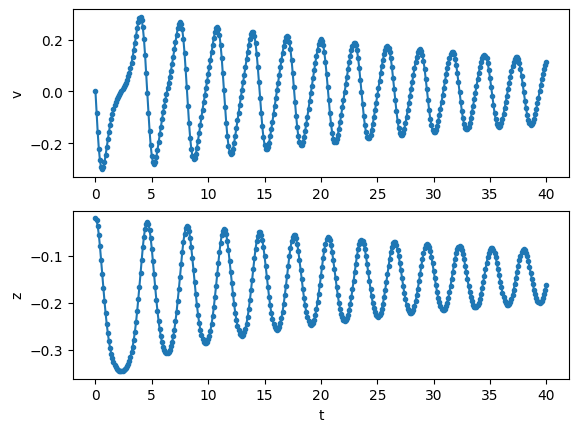

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
def dYdt( t, Y, \
         amp = lambda t, Y, **kwrd: -1.3, \
         far = lambda t, Y, **kwrd: -.05*Y[0], \
         esp = lambda t, Y, **kwrd: np.sin(2*np.pi*Y[1]), \
         gef = 1, calculaEq = False, **kwrd ):
  if calculaEq:
    fun2solve = lambda z:dYdt( t=t, Y=[0,z], amp=amp, esp=esp, far=far, gef=gef, **kwrd )[0]
    zEq = fsolve( fun2solve, Y[1] )[0]
    return zEq
  v, z = Y
  dvdt = amp(t,Y,**kwrd)*esp(t,Y,**kwrd) - gef + far(t,Y,**kwrd)
  dzdt = v
  return [dvdt, dzdt]

z01 = dYdt( t=0, Y=[0, 0], calculaEq=True )
print( f'{ z01 = :.3f}' )


v0 = 0.
z0 = z01+0.12
t_span = [0., 40.]
dt = 0.1
SOL = solve_ivp( fun=dYdt, t_span=t_span, y0=[v0,z0], method='RK45',\
                  t_eval=np.arange(t_span[0], t_span[-1]+0.999*dt, dt) )

plt.figure()
plt.subplot(2,1,1)
plt.plot( SOL.t, SOL.y[0], '.-' )
plt.ylabel( 'v' )
plt.subplot(2,1,2)
plt.plot( SOL.t, SOL.y[1], '.-' )
plt.ylabel( 'z' )
plt.xlabel( 't' )
plt.show()

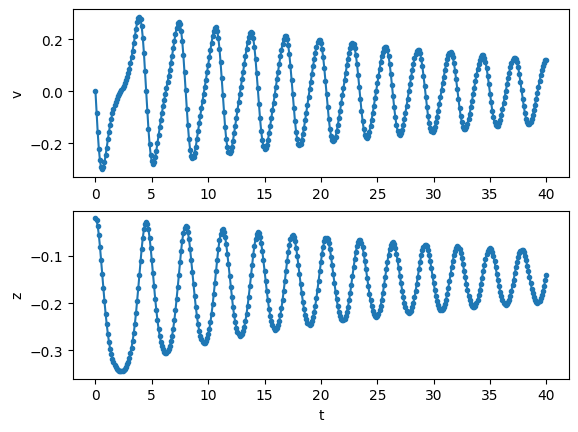

In [ ]:
def resolve( funR=dYdt, t_span = [0., 40.], y0='Eq', dt = 0.1, events=None, \
            SHOW=True, RETORNA=False, max_step=np.inf, **kwrd ):
  if (y0=='Eq'):
    z0 = funR( t=-1, Y=[0, 0], calculaEq=True, **kwrd )
    v0 = 0.
    y0Ef = [v0, z0]
  else:
    y0Ef = y0.copy()

  # print( f'{y0Ef = }' )
  t_eval=np.arange(t_span[0], t_span[-1]+dt, dt)
  t_eval = t_eval[t_eval<=t_span[-1]]
  SOL = solve_ivp( fun=lambda t, Y: funR(t,Y,**kwrd), t_span=t_span, y0=y0Ef, method='DOP853',\
                    t_eval=t_eval, max_step=max_step, events=events )

  if SHOW:
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot( SOL.t, SOL.y[0], '.-' )
    plt.ylabel( 'v' )
    plt.subplot(2,1,2)
    plt.plot( SOL.t, SOL.y[1], '.-' )
    plt.ylabel( 'z' )
    plt.xlabel( 't' )
    plt.show()
  if RETORNA:
    return SOL

resolve(y0=[0, -.02])

zEq = -0.140


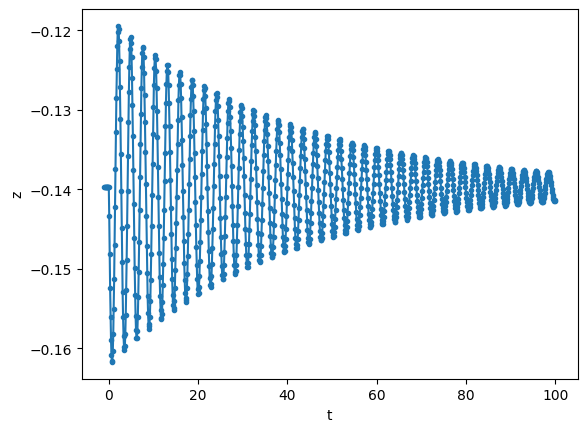

In [ ]:
dtOff = 5*.01
t_span = [-1., 100.]
DT = None
# DT = 3.7

def fazOff(t, Y, dtOff=.05, tIni=0, ampOn=-1.3, DT=None, **kwrd):
  tEf = (t-tIni)
  if (tEf<0) or (dtOff is None):
    return ampOn
  if DT is not None:
    tEf = tEf % DT
  if tEf>=0. and tEf<=dtOff:
    return 0.
  else:
    return ampOn


Dict_comOff = dict( amp = fazOff, dtOff=dtOff, DT=DT )
zEq = dYdt( t=-1, Y=[0, 0], calculaEq=True, **Dict_comOff )
v0 = 0.
z0 = zEq
print( f'{zEq = :.3f}' )
SOLComOff = solve_ivp( fun=lambda t,Y:dYdt(t,Y,**Dict_comOff), \
                      t_span=t_span, y0=[v0,z0], method='DOP853', \
                  t_eval=np.arange(t_span[0], t_span[-1]+0.999*dt, dt), \
                       max_step=dtOff/4 )


plt.figure()
plt.plot( SOLComOff.t, SOLComOff.y[1], '.-' )
plt.xlabel( 't' )
plt.ylabel( 'z' )
plt.show()

2.00, 0.0236
2.10, 0.0275
2.20, 0.0321
2.30, 0.0375
2.40, 0.0455
2.50, 0.0572
2.60, 0.0782
2.70, 0.108
2.80, 0.141
2.90, 0.173
3.00, 0.203
3.10, 0.231
3.20, 0.0600
3.30, 0.0456
3.40, 0.0384
3.50, 0.0332
3.60, 0.0306
3.70, 0.0282
3.80, 0.0262
3.90, 0.0259
4.00, 0.0251


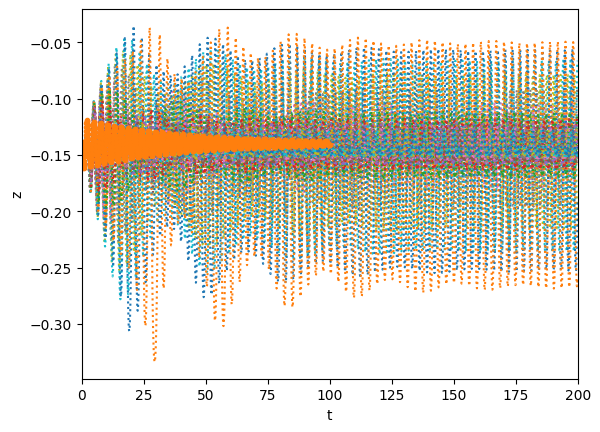

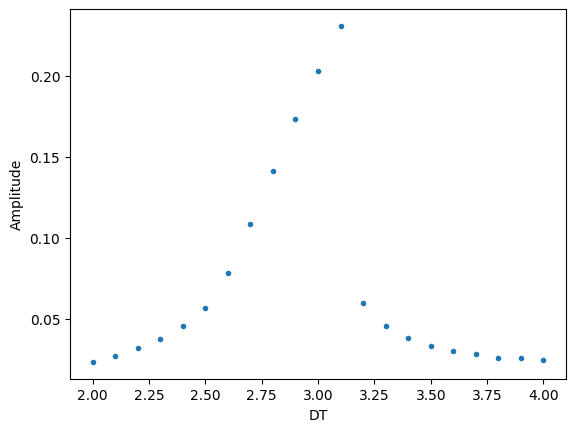

In [ ]:
AMPs = []
tTrans = 100
#DTs =  np.arange(2.0, 4.0+0.1, 0.1)
DTs =  np.arange(2.6, 2.9+0.1, 0.05)
#DTs =  np.arange(2.0, 10.0+0.3, 0.3)
#DTs =  np.arange(5.0, 7.0+0.1, 0.1)
fig, ax = plt.subplots()
plt.xlabel( 't' )
plt.ylabel( 'z' )
def eventoExtremo(t, Y):
  v, z = Y
  return v
for i, DT in enumerate(DTs):
  SOL = resolve( t_span=[-1., 200.], dt=0.05, max_step=dtOff/4, dtOff=dtOff, amp=fazOff, DT=DT, \
                SHOW=False, RETORNA=True, events=eventoExtremo )
  if i%1==0:
    ax.plot( SOL.t, SOL.y[1], ':' )
    # plt.title( f'DT = {DT}' )
  amplitude = max( SOL.y_events[0][SOL.t_events[0]>tTrans,1] ) - \
              min( SOL.y_events[0][SOL.t_events[0]>tTrans,1] )
  #amplitude = max(SOL.y[1][SOL.t>tTrans]) - min(SOL.y[1][SOL.t>tTrans])
  AMPs.append( amplitude )
  print( f'{DT:.2f}, {amplitude:#.3g}' )
ax.plot( SOLComOff.t, SOLComOff.y[1], '.-' )
plt.xlim([0, 200])
plt.show()

plt.figure()
plt.plot( DTs, AMPs, '.' )
plt.xlabel( 'DT' )
plt.ylabel( 'Amplitude' )
plt.show()
